## Assignment 2 ##

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind
import seaborn as sns


In [6]:
df = pd.read_csv('COVID-19_CBC_Data.csv')
#admission = df['Admission_DATE']
#discharge = df['Discharge_DATE']
outcome = df['Outcome'] 
age = df['Patient Age']
gender = df['Gender']
rbc = df['Red blood cell distribution width']
monocytes = df['Monocytes(%)']
lymphocytes = df['Lymphocyte Count']
platelet = df['Platelet Count']
wbc = df['White blood cell count']


avg_rbc = df.groupby('Patient Age')['Red blood cell distribution width'].mean()




In [ ]:
avg_monocytes = monocytes.mean()
avg_lymphocytes = lymphocytes.mean()

monocytes_ttest = ttest_1samp(monocytes, avg_monocytes)
lymphocytes_ttest = ttest_1samp(lymphocytes, avg_lymphocytes)

monocytes_2 = ttest_ind(monocytes, avg_monocytes)
lymphocytes_2 = ttest_ind(lymphocytes, avg_lymphocytes)

two_sample_ttest = ttest_ind(monocytes, lymphocytes)   
# print(two_sample_ttest)

In [15]:
# 1b. 

two_sample_ttest = ttest_ind(platelet, wbc)
print(two_sample_ttest.pvalue)


8.829768574442878e-90


C:\Users\notta\AppData\Local\Temp\ipykernel_10952\3060136730.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['WBC', 'Platelet'], y=[mean_wbc, mean_platelet], palette=['coral', 'lightblue'])


<Axes: >

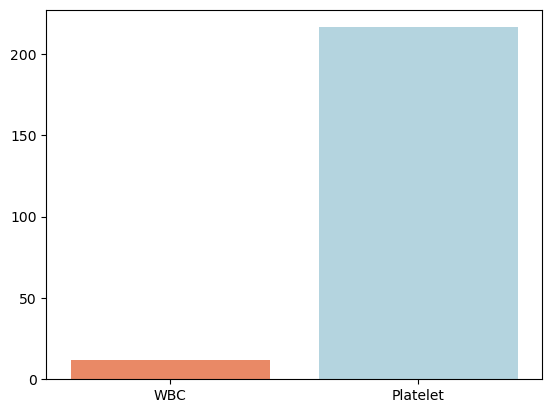

In [ ]:
# 1c. 
mean_wbc = wbc.mean()
mean_platelet = platelet.mean()
sns.barplot(x=['WBC', 'Platelet'], y=[mean_wbc, mean_platelet], palette=['coral', 'lightblue'])


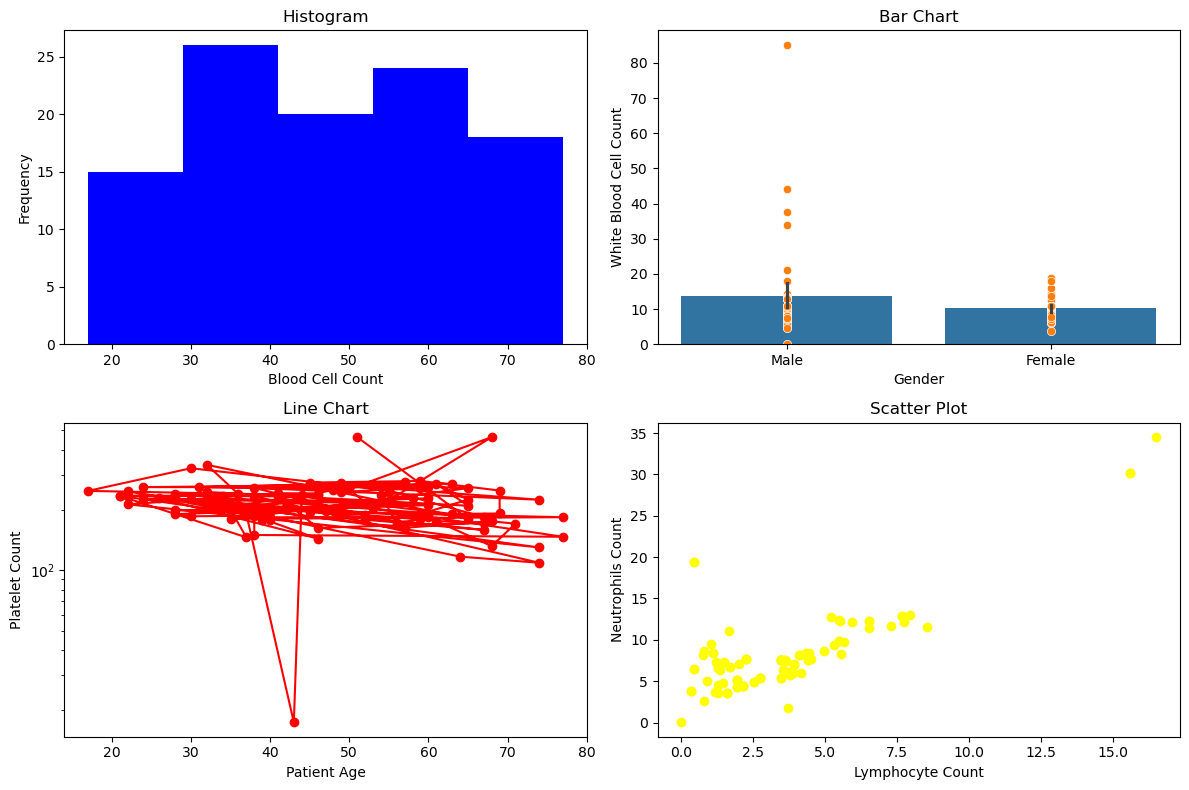

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = "COVID-19_CBC_Data.csv"
df = pd.read_csv(file_path)

# Set figure size for better visualization
plt.figure(figsize=(12, 8))

# 1. Histogram
plt.subplot(2, 2, 1)
plt.hist(df["Patient Age"], bins=5, color="blue")
plt.xlabel("Blood Cell Count")  
plt.ylabel("Frequency")
plt.title("Histogram")

# 2. Bar Chart
plt.subplot(2, 2, 2)
sns.barplot(x=df["Gender"], y=df["White blood cell count"])
sns.scatterplot(x=df["Gender"], y=df["White blood cell count"])
plt.xlabel("Gender")
plt.ylabel("White Blood Cell Count")
plt.title("Bar Chart")

# 3. Line Chart
plt.subplot(2, 2, 3)
plt.plot(df["Patient Age"], df["Platelet Count"], marker="o", linestyle="-", color="red")
plt.xlabel("Patient Age")
plt.ylabel("Platelet Count")
plt.yscale("log") 
plt.title("Line Chart")

# 4. Scatter Plot
plt.subplot(2, 2, 4)
plt.scatter(df["Lymphocyte Count"], df["Neutrophils Count"], color="yellow")  
plt.xlabel("Lymphocyte Count")
plt.ylabel("Neutrophils Count")
plt.title("Scatter Plot")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Histogram of Blood Cell Count')

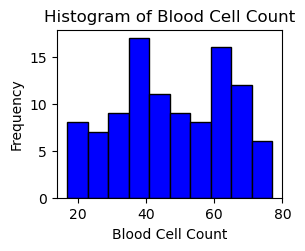

In [7]:
# 1. Histogram
plt.subplot(2, 2, 1)
plt.hist(df["Patient Age"], bins=10, color="blue", edgecolor='black')
plt.xlabel("Blood Cell Count")  
plt.ylabel("Frequency")
plt.title("Histogram of Blood Cell Count")

Text(0.5, 1.0, 'White Blood Cell Count and Gender')

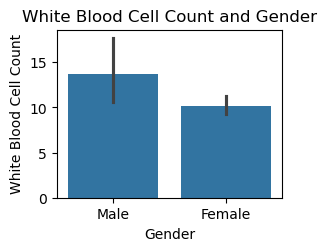

In [35]:
# 2. Bar Chart
plt.subplot(2, 2, 2)
sns.barplot(x=df["Gender"], y=df["White blood cell count"])
plt.xlabel("Gender")
plt.ylabel("White Blood Cell Count")
plt.title("White Blood Cell Count and Gender")

Text(0.5, 1.0, 'Platelet Count and Patient Age')

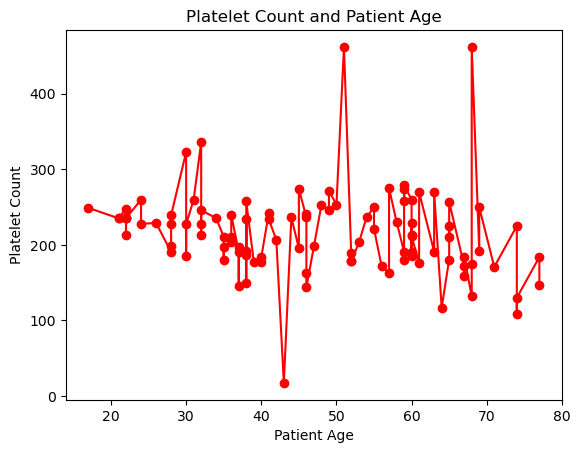

In [37]:
df_sorted = df.sort_values(by="Patient Age")
plt.subplot(1, 1, 1)
plt.plot(df_sorted["Patient Age"], df_sorted["Platelet Count"], marker="o", linestyle="-", color="red")
plt.xlabel("Patient Age")
plt.ylabel("Platelet Count")
plt.title("Platelet Count and Patient Age")


Text(0.5, 1.0, 'Neutrophils Count vs. Lymphocyte Count')

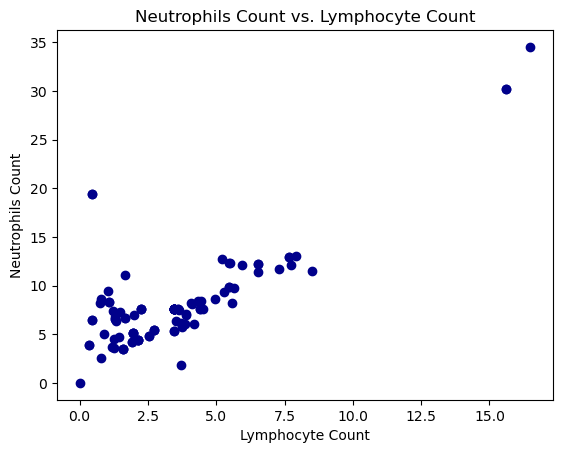

In [39]:
plt.scatter(df["Lymphocyte Count"], df["Neutrophils Count"], color="darkblue")  
plt.xlabel("Lymphocyte Count")
plt.ylabel("Neutrophils Count")
plt.title("Neutrophils Count vs. Lymphocyte Count")

In [33]:
(12.45901639 - 11.422857145) / np.sqrt((11.77425266* 11.7742 / 61) + (7.632482346 * 7.63248 / 42))

np.float64(0.5416327407186395)

In [26]:
import numpy as np
1.96 * 11.77425266 /  np.sqrt(61)
print(11.42285714 + (1.96 * (7.632482346 /  np.sqrt(42))))

13.731183625248079


In [28]:
print(12.45901639 - (1.96 * (11.77425266 /  np.sqrt(61))))

9.504240784709118


C:\Users\notta\AppData\Local\Temp\ipykernel_28928\2720503149.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = data.groupby("Outcome")["White blood cell count"].mean()
C:\Users\notta\AppData\Local\Temp\ipykernel_28928\2720503149.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  errors = data.groupby("Outcome")["White blood cell count"].sem()


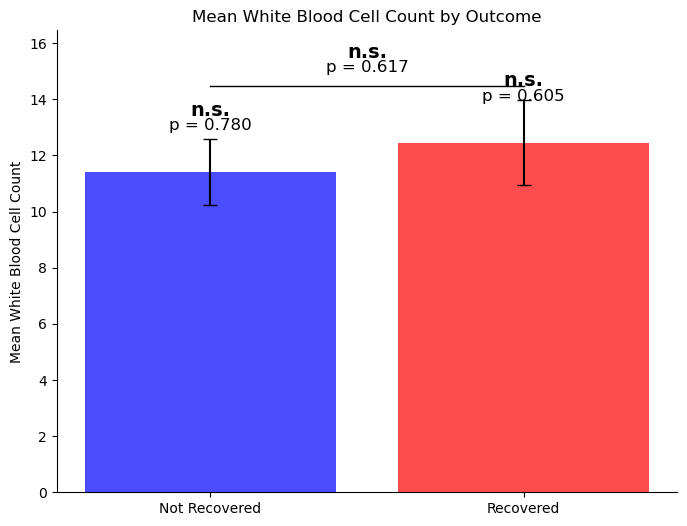

In [30]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("COVID-19_CBC_Data.csv")

# Ensure Outcome is a categorical variable
data["Outcome"] = data["Outcome"].astype("category")

# Extract white blood cell count for Recovered and Not Recovered groups
wbc_recovered = data.loc[data["Outcome"] == "Recovered", "White blood cell count"]
wbc_not_recovered = data.loc[data["Outcome"] == "Not Recovered", "White blood cell count"]

# Compute means and standard errors
means = data.groupby("Outcome")["White blood cell count"].mean()
errors = data.groupby("Outcome")["White blood cell count"].sem()

# Perform one-sample t-tests
pop_mean = data["White blood cell count"].mean()
one_sample_t_recovered = stats.ttest_1samp(wbc_recovered, pop_mean)
one_sample_t_not_recovered = stats.ttest_1samp(wbc_not_recovered, pop_mean)

# Perform two-sample t-test
two_sample_t_test = stats.ttest_ind(wbc_recovered, wbc_not_recovered)

# Function to determine significance stars
def significance_stars(p_value):
    if p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    return "n.s."

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(means.index, means.values, yerr=errors.values, capsize=5, color=['blue', 'red'], alpha=0.7)

# Annotate p-values above bars
for i, (mean, p_value) in enumerate(zip(means, [one_sample_t_recovered.pvalue, one_sample_t_not_recovered.pvalue])):
    ax.text(i, mean + 1.5, f"p = {p_value:.3f}", ha='center', fontsize=12)
    ax.text(i, mean + 2, significance_stars(p_value), ha='center', fontsize=14, fontweight='bold')

# Two-sample t-test annotation
max_y = max(means) + 2
ax.plot([0, 1], [max_y, max_y], color='black', lw=1)  
ax.text(0.5, max_y + 0.5, f"p = {two_sample_t_test.pvalue:.3f}", ha='center', fontsize=12)
ax.text(0.5, max_y + 1, significance_stars(two_sample_t_test.pvalue), ha='center', fontsize=14, fontweight='bold')

# Customize plot
ax.set_title("Mean White Blood Cell Count by Outcome")
ax.set_ylabel("Mean White Blood Cell Count")
ax.set_ylim(0, max_y + 2)
sns.despine()

plt.show()
